In [ ]:
# Import Libraries

import numpy as np
import math
import matplotlib.pyplot as plt 
%matplotlib inline

import cv2
import time
from scipy import signal

Q1 (i)

In [ ]:
#X axis of plot
X = np.arange(-20,21,1)
X

array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20])

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  3
  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


Text(0, 0.5, 'Derivative ReLU Function')

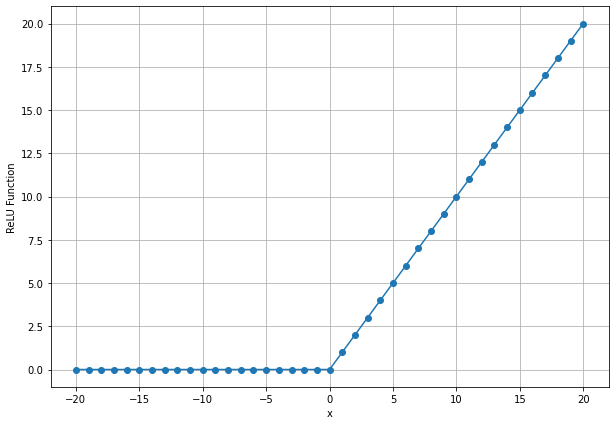

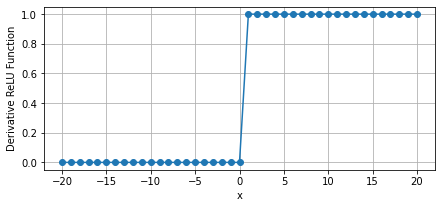

In [ ]:
#ReLU

ReLU = np.arange(-20,21,1)
print(ReLU)

ReLU = np.where(ReLU < 0, 0, ReLU)
print(ReLU)
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(X,ReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("ReLU Function")

deri_ReLU = np.where(ReLU<=0, 0,1)
print(deri_ReLU)
plt.rcParams["figure.figsize"] = (7,3)
plt.figure()
plt.plot(X,deri_ReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("Derivative ReLU Function")

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]


Text(0, 0.5, 'Derivative Leaky ReLU Function')

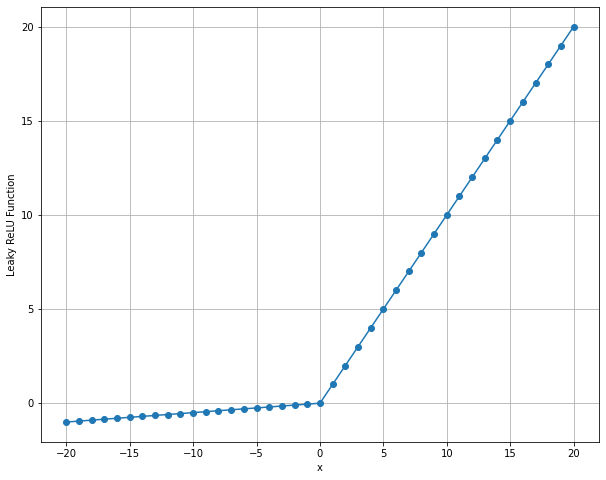

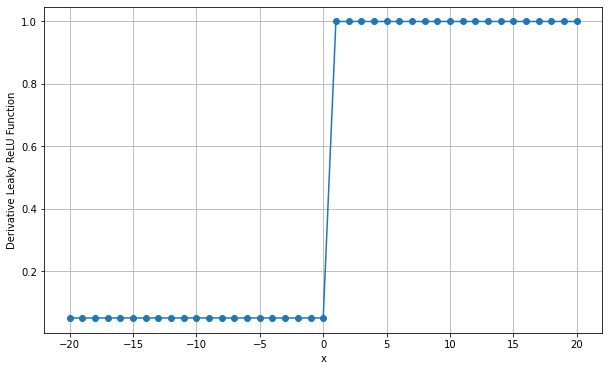

In [ ]:
#Leaky ReLU

alpha = 0.05
Leaky_ReLU = np.where(X<0,alpha*X,X)
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(X,Leaky_ReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("Leaky ReLU Function")

deri_Leaky_ReLU = np.where(Leaky_ReLU<=0, alpha,1)
print(deri_Leaky_ReLU)
plt.rcParams["figure.figsize"] = (10,6)
plt.figure()
plt.plot(X,deri_Leaky_ReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("Derivative Leaky ReLU Function")

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1. ]


Text(0, 0.5, 'Derivative Parametric ReLU Function')

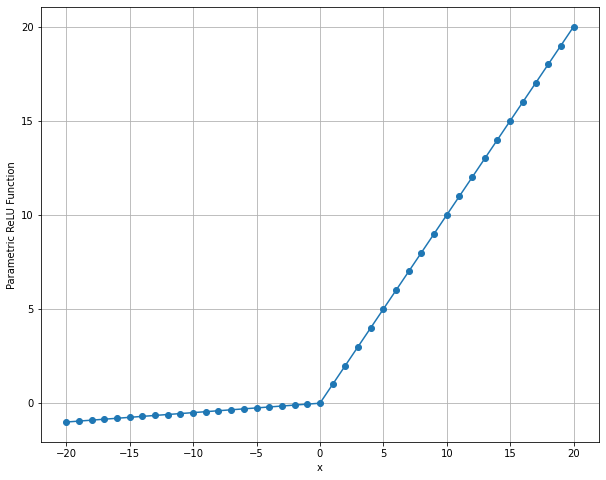

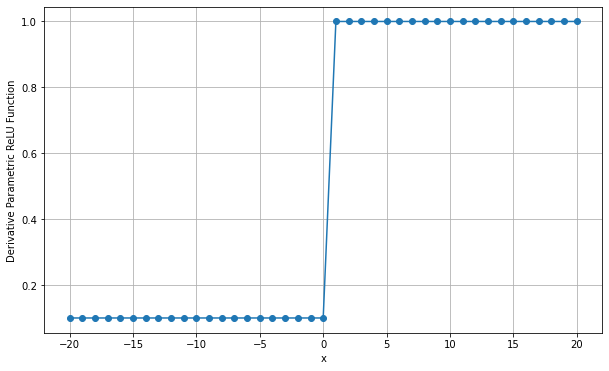

In [ ]:
#Parametric ReLU

alpha1 = 0.1
scale = 1
PReLU = np.where(X<0,alpha*X,X*scale)
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(X,PReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("Parametric ReLU Function")

deri_PReLU = np.where(PReLU<=0, alpha1,1)
print(deri_PReLU)
plt.rcParams["figure.figsize"] = (10,6)
plt.figure()
plt.plot(X,deri_PReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("Derivative Parametric ReLU Function")

Text(0, 0.5, 'ELU Function')

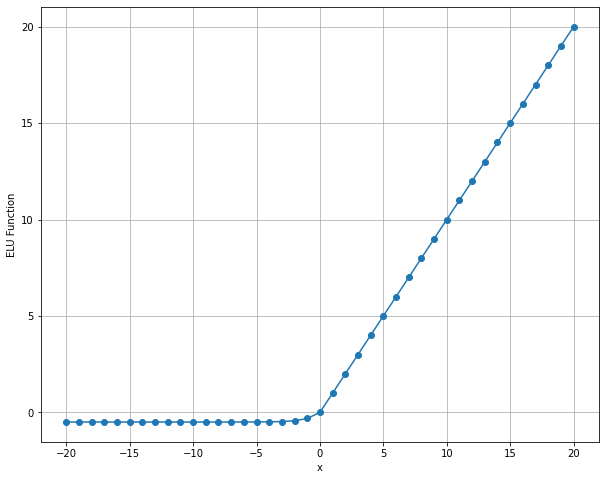

In [ ]:
#Exponential ReLU
alpha = 0.5
ELU = []
for i in range(41):
    if X[i]<0:
        ELU.append(alpha*(math.exp(X[i])-1))
    else:
        ELU.append(X[i])
ELU

plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(X,ELU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("ELU Function")

Text(0, 0.5, 'SELU Function')

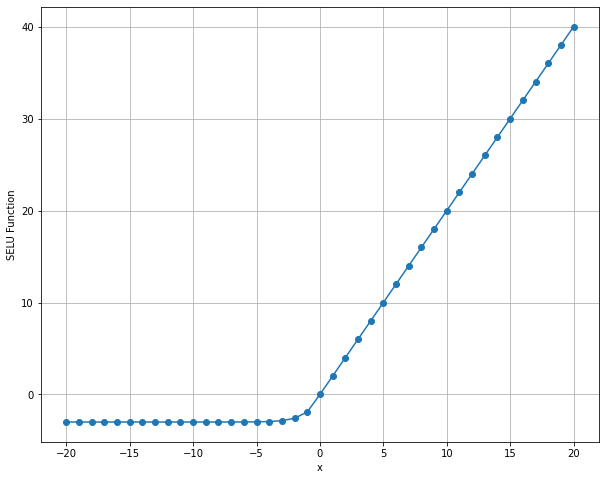

In [ ]:
#Scaled Exponential Linear Units (SELU)

scale = 2
alpha = 1.5
SELU =[]
for i in range(41):
    if X[i]<0:
        SELU.append(alpha*scale*(math.exp(X[i])-1))
    else:
        SELU.append(scale*X[i])
SELU

plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(X,SELU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("SELU Function")

Text(0, 0.5, 'Smooth ReLU Function')

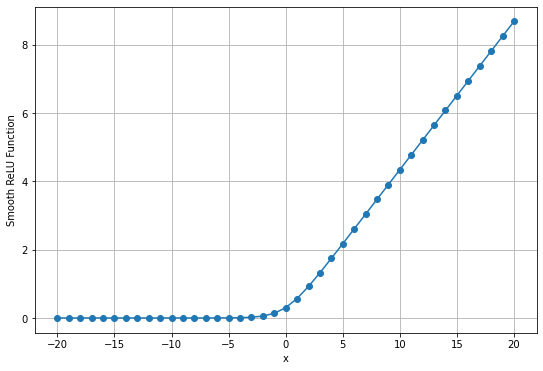

In [ ]:
#SoftPlus (Smooth ReLU)

smoothReLU = []
for i in range(41):
    smoothReLU.append(math.log10(1+math.exp(X[i])))

plt.rcParams["figure.figsize"] = (9,6)
plt.figure()
plt.plot(X,smoothReLU,'o-')
plt.grid()
plt.xlabel("x")
plt.ylabel("Smooth ReLU Function")

Q1 (ii)

In [ ]:
lena = cv2.imread("lena.jpg")
lena = lena[:,:,0]
lena = cv2.resize(lena,(100,100))

In [ ]:
def conv2d_toeplitz(image,filter):
    
    (h_filter, l_filter) = filter.shape
    (h_image, l_image) = image.shape
    
    h_out = h_filter + h_image - 1
    l_out = l_filter + l_image - 1
    
    padded_filter = np.zeros((h_out,l_out))
    padded_filter[h_out - h_filter:, :l_filter] = filter
    
    toeplitz_matrix_index = toeplitz(range(h_out), h_image)
    toeplitz_matrix_index = toeplitz_matrix_index.astype(np.int)
    
    toeplitz_elements = np.zeros((h_out, l_out, l_image))

    for i in range(h_out):
        toeplitz_elements[i,:,:] = toeplitz(padded_filter[h_out - i - 1], l_image)
        
    flattened_image = np.flip(image, axis = 0).reshape(np.shape(image)[0] * np.shape(image)[1])
    
    toeplitz_matrix_row = np.zeros((l_out, h_image * l_image))
    final_output = np.zeros((h_out, l_out))
    
    number_of_multiplications = 0
    
    for i in range(h_out):
        for j in range(h_image):
            toeplitz_matrix_row[:, h_image * j : h_image * (j+1)] = toeplitz_elements[toeplitz_matrix_index[i,j],:,:]
        final_output[h_out - 1 - i, :] = np.matmul(toeplitz_matrix_row, flattened_image)
        number_of_multiplications += l_out * h_image * l_image
    
    return final_output, number_of_multiplications

In [ ]:
def toeplitz(column,length):
    toeplitz = np.zeros((len(column),length))
    if np.sum(np.abs(column)) == 0:
        return toeplitz
    n = len(column)
    for i in range(length):
        toeplitz[i:,i] = column[:n-i]
        toeplitz[:i,i] = column[n-i:]
    return toeplitz

In [ ]:
def conv2d_toeplitz_list(image,filter):
    
    (h_filter, l_filter) = filter.shape
    (h_image, l_image) = image.shape
    
    h_out = h_filter + h_image - 1
    l_out = l_filter + l_image - 1
    
    padded_filter = np.zeros((h_out, l_out))
    padded_filter[h_out - h_filter :, : l_filter] = filter
    
    toeplitz_matrix_index = toeplitz_list(range(h_out), h_image)
    toeplitz_matrix_index = toeplitz_matrix_index.astype(np.int)
    
    toeplitz_elements = np.array([toeplitz_list(padded_filter[h_out - i - 1], l_image) for i in range(h_out)])
    
    flattened_image = np.flip(image, axis = 0).reshape(np.shape(image)[0] * np.shape(image)[1])
    
    toeplitz_matrix_row = np.zeros((l_out, h_image * l_image))
    final_output = np.zeros((h_out, l_out))
    
    number_of_multiplications = 0
    
    final_output = [np.matmul(np.concatenate([toeplitz_elements[toeplitz_matrix_index[i ,j], :, :] for j in range(h_image)], axis=1), flattened_image) for i in range(h_out)]
    
    return np.flip(final_output,axis = 0)

In [ ]:
def toeplitz_list(column,length):
    column = np.array(column)
    if np.sum(np.abs(column)) == 0:
        return np.zeros((len(column),length))
    n = len(column)
    toeplitz = [np.concatenate((column[n-i:],column[:n-i])) for i in range(length)]
    return np.transpose(toeplitz)

In [ ]:
t1 = time.time()
output, number_of_multiplications = conv2d_toeplitz(lena,np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16)
t2 = time.time()

In [ ]:
t3 = time.time()
list_output = conv2d_toeplitz_list(lena,np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16)
t4 = time.time()

In [ ]:
t5 = time.time()
scipy_output = signal.convolve2d(lena,np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16)
t6 = time.time()

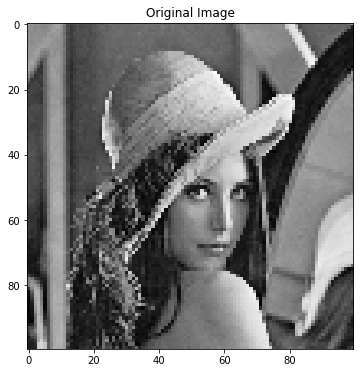

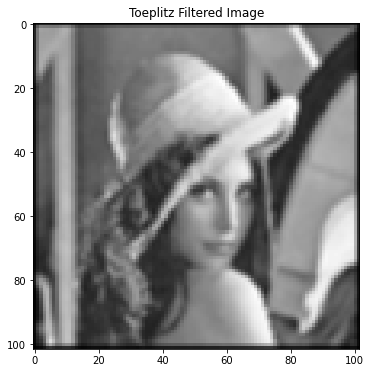

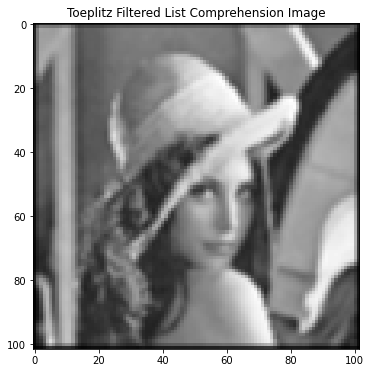

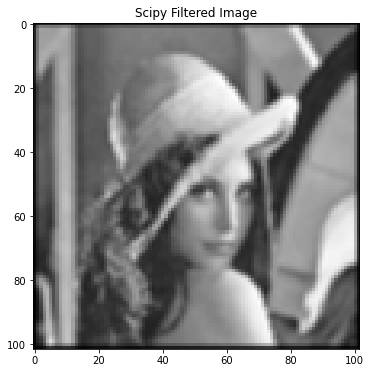

Number of multiplications = 104040000


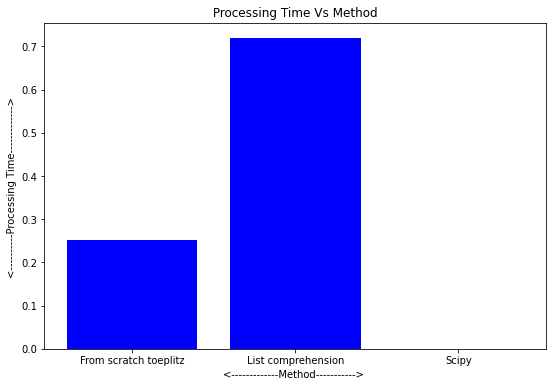

In [ ]:

plt.imshow(lena,cmap = "gray")
plt.title('Original Image')
plt.show()
plt.imshow(output,cmap = "gray")
plt.title('Toeplitz Filtered Image')
plt.show()
plt.imshow(list_output,cmap = "gray")
plt.title('Toeplitz Filtered List Comprehension Image')
plt.show()
plt.imshow(scipy_output,cmap = "gray")
plt.title('Scipy Filtered Image')
plt.show()
print("Number of multiplications = " + str(number_of_multiplications))

x = ['From scratch toeplitz', 'List comprehension', 'Scipy']
Processing_Times = [t2-t1,t4-t3,t6-t5]
x_pos = [i for i in range(len(x))]
plt.bar(x_pos, Processing_Times, color='blue')
plt.xlabel("<-------------Method-----------> ")
plt.ylabel("<----------Processing Time-------------> ")
plt.title(" Processing Time Vs Method ")
plt.xticks(x_pos, x)
plt.show()



Q1 (iii)

In [ ]:
def spat_sep_conv(image_2d,kernel_1d):
    no_of_multiplications = 0
    n = len(kernel_1d)
    pad = int(n/2)
    padded_image = padded_n(image_2d,n)
    conv1d = np.zeros(np.shape(image_2d))
    for i in range(pad,pad+np.shape(image_2d)[0]):
        for j in range(0,np.shape(image_2d)[1]):
            conv1d[i-pad,j] = np.dot(kernel_1d,padded_image[i,j:j+n])
            no_of_multiplications += n
    padded_conv1d = padded_n(conv1d,n)
    conv2d = np.zeros(np.shape(image_2d))
    for i in range(0,np.shape(image_2d)[0]):
        for j in range(pad,pad+np.shape(image_2d)[1]):
            conv2d[i,j-pad] = np.dot(kernel_1d,padded_conv1d[i:i+n,j])
            no_of_multiplications += n
    return conv2d,no_of_multiplications

In [ ]:
def padded_n(image,n):
    pad = int(n/2)
    image = np.array(image)
    padded_image = np.zeros((np.shape(image)[0]+pad*2,np.shape(image)[1]+pad*2))
    padded_image[pad:np.shape(image)[0]+pad,pad:np.shape(image)[1]+pad] = image
    return padded_image

In [ ]:
def spat_sep_conv_list(image_2d,kernel_1d):
    n = len(kernel_1d)
    pad = int(n/2)
    padded_image = padded_n(image_2d,n)
    conv1d = [[np.dot(kernel_1d,padded_image[i,j:j+n]) for j in range(0,np.shape(image_2d)[1])] for i in range(pad,pad+np.shape(image_2d)[0])]
    padded_conv1d = padded_n(conv1d,n)
    
    conv2d = [[np.dot(kernel_1d,padded_conv1d[i:i+n,j]) for j in range(pad,pad+np.shape(image_2d)[1])] for i in range(0,np.shape(image_2d)[0])]

    return conv2d

In [ ]:
t1 = time.time()
filtered_image,number_of_multiplications = spat_sep_conv(lena,np.array([1,4,6,4,1])/16)
t2 = time.time()
filtered_image_list = spat_sep_conv_list(lena,np.array([1,4,6,4,1])/16)
t3 = time.time()

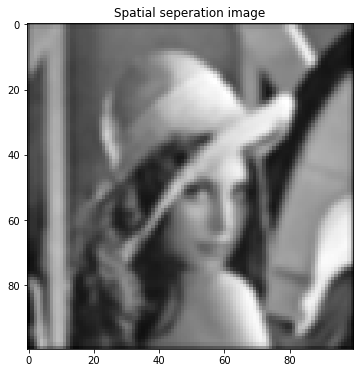

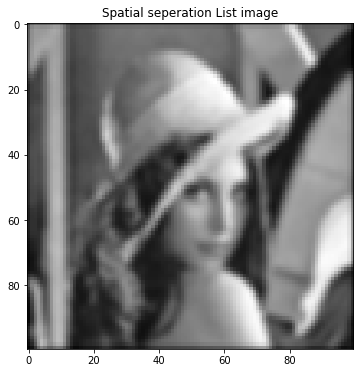

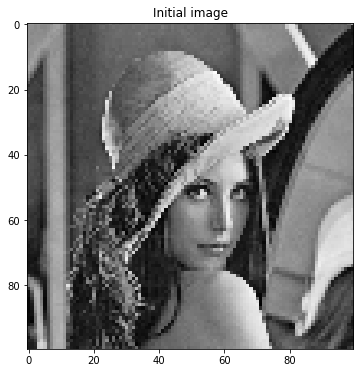

Number of multiplications used - 100000


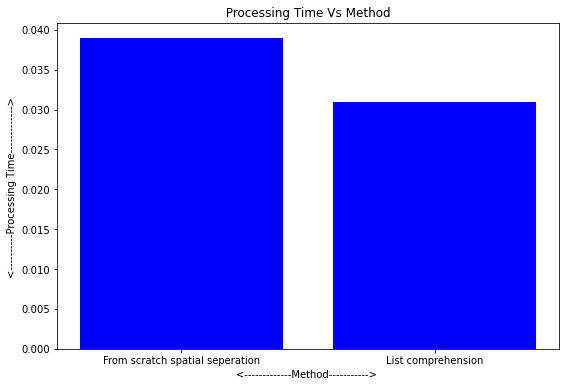

In [ ]:
plt.imshow(filtered_image/255,cmap = "gray")
plt.title("Spatial seperation image")
plt.show()
plt.imshow(filtered_image_list,cmap = "gray")
plt.title("Spatial seperation List image")
plt.show()
plt.imshow(lena,cmap = "gray")
plt.title("Initial image")
plt.show()
print("Number of multiplications used - "+str(number_of_multiplications))

x = ['From scratch spatial seperation', 'List comprehension']
Processing_Times = [t2-t1,t3-t2]
x_pos = [i for i in range(len(x))]
plt.bar(x_pos, Processing_Times, color='blue')
plt.xlabel("<-------------Method-----------> ")
plt.ylabel("<----------Processing Time-------------> ")
plt.title(" Processing Time Vs Method ")
plt.xticks(x_pos, x)
plt.show()